In [1]:
from IPython.display import Image

- Uppsala University(Sweden)
- Author: Jimmy Jansson
- 군집 분석을 활용하여 선수를 분석한 논문으로 우리조가 하려는 방식에 적용하는 것이 가능할 것이라고 판단됨.
- 군집분석, 계층적 군집분석, 비계층적 군집 분석을 이용한 논문



# 데이터 수집
- 분데스리가(독일 1부리그) 20-21 시즌 선수 데이터 활용
- 337 X 92 데이터 셋 활용
	- 450분 이상 출장한 선수의 데이터 활용(5경기 이상 출장한 선수 기준)
	- 골키퍼를 제외함.
		- 그 이유는 골키퍼는 다른 필드플레이어와 같은 방식으로 기록을 집계할 수 없기 때문임.


# 데이터 전처리
- (337, 92) 데이터를 (337, 51)로 압축 실시
- 변수의 가중치를 동일하게 하기 위해서 가장 상관관계가 높은 계수를 제거함.
	- 2개 이상의 변수가 0.8 이상의 상관계수라면 더 높은 것을 남기고 나머지를 제거한다.
		- 만약 두 변수를 남겨둔다면 과하게 수치가 가중되어 값이 변형될 수 있기 때문
	- 이 방식을 통해서 51가지 변수를 남겨서 머신러닝을 진행함.
- **해당 논문에서는 Complete linkage hierarchical clustering, non-hierarchical K-means method 두 방식을 활용하여 분석을 진행하였음**



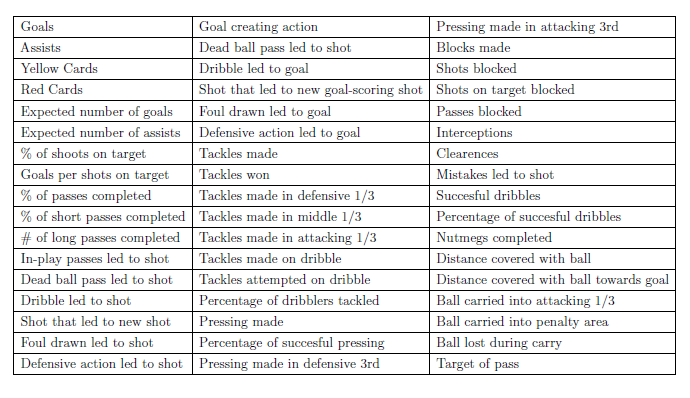

In [2]:
Image('/content/drive/MyDrive/team/선수 경기 데이터.png')

## 선정이유
- 구현하기 가장 쉬우며 대중적임
- 연속형 변수를 사용하는 경우의 방법

- 데이터 분류
	- 각 데이터는 3가지 다른 위치를 기준으로 하위집합을 구분하였음
		- FW, MF, DF(Player’s Position)



## 데이터 세트
- 유클리드 거리를 사용하여 각 값의 거리 정의하였음.


### 군집의 수 선택
- 초기 집합을 그룹화한 뒤 K-means 알고리즘 / Single-linkage method을 활용하여 각기 다른 결과를 비교함.
- 결과의 정량화를 통해 각 군집의 분산을 살펴봄(주관적이고 결과에 수치를 붙이기는 어려울 수 있음.)
	- Elbow method
		- 비계층화 군집(K-means)에서 가장 일반적으로 사용되는 방법
		- 클러스터 간의 거리의 합을 표시하는 interia 수치가 급격히 떨어지점을 찾음
		- 이후 이 지점의 K값을 군집의 개수로 활용함(interia_속성으로 확인)
    
	- Silhouette(실루엣) method
		- 군집타당성 지표인 실루엣 점수 이용
		- 1에 가까울수록 군집화가 되었다고 판단함.

	- 위 두가지 방식은 군집 평가를 정의하는데 사용되며, 두 군집 간의 측정 정도의 궁합을 확인할 수 있다.
    - 이것을 **WCSM(Within-Cluster scatter matrix)와 BCSM(Between-Cluster scatter matrix)이라고 부른다**

    - Calinski-Harabasz Index
        - WCSM과 BCSM간의 비율로 표현하며, 군집 성능 지수 및 데이터 세트에서 숫자 K를 선택하는 방법으로 사용되며, 지수는 모든 군집에 대한 군집간 분산 및 군집간 분산의 합의 비율로 정의됨.
        - 다음과 같은 식으로 나타낸다.
        


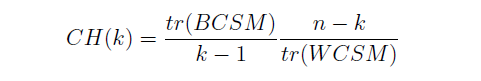

In [3]:
Image('/content/drive/MyDrive/team/Calinski-Harabasz Index.png')

- Gap-statistic method
    - 다른 방식들보다 최신 방식
    - 클러스터 압축과 (Python에서 생성된) 데이터의 null 참조 분포를 비교
    - 숫자 K를 선택한 다음 null 참조 분포의 전체적인 동작을 기반으로 클러스터 내 거리를 살펴봄.

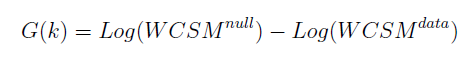

In [4]:
Image('/content/drive/MyDrive/team/Gap-statistic method.png')

In [ ]:
- Dendrogram (Hierarchical)
    - 데이터간의 묶인 거리를 시각화 한 것

# 결론


- 데이터 전처리
    - Z-score를 통한 정규화
    - 이후 상관관계 계수가 0.8이 넘는 변수 제거
    - 모든 군집 개수 책정 알고리즘을 활용하여 군집의 개수를 측정하였음.

    - 각 세션은 데이터 집합 결과를 보여주고, 필드 위 선수의 위치를 기준으로 하위집합의 결과를 보여줌.

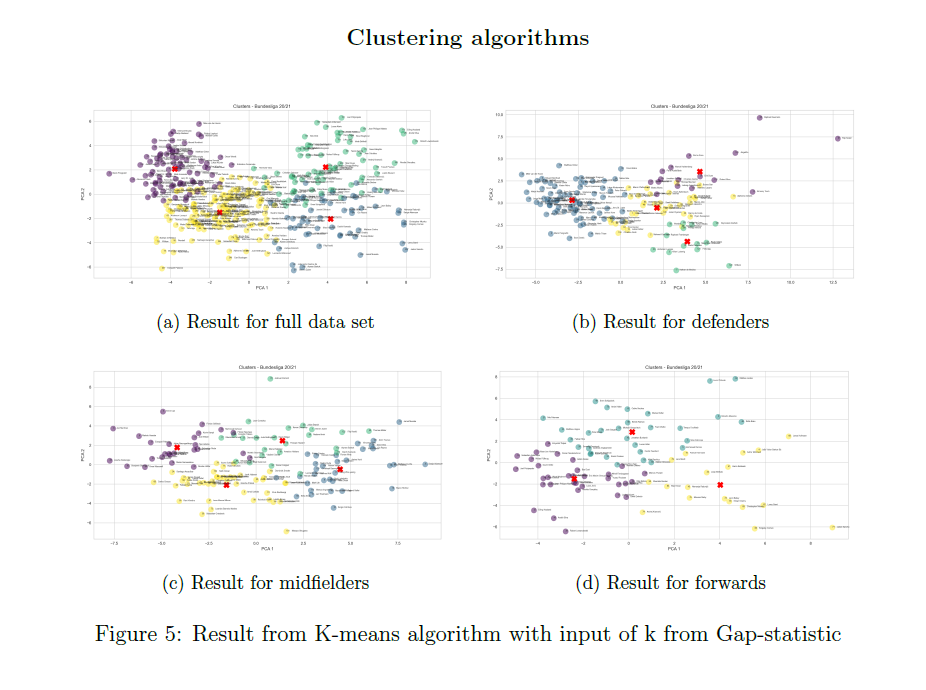

In [5]:
Image('/content/drive/MyDrive/team/clustering_result1.png')

- Elbow method를 활용하여 각 가중치를 관찰한 결과, 모든 값이 극적으로 변화하는 지점이 관찰되지 않았음.
    - 이는 각 점들이 비슷한거리에 위치한다는 것을 의미함.
    - K 값의 증가에 따라 변동이 줄지 않기 때문.

- Calinski-Harabasz Index 에서도 명확한 군집을 나타내는 지표를 관찰할 수 없었음.

- Gap-statistic을 통한 군집 분석 실시
    - 총 데이터는 4개로 구분되었음
    - 공격수끼리는 3개의 군집
    - 미드필더, 수비수는 각각 4개 군집으로 구성됨.

## K-mean 알고리즘 결과

- 비슷한 경기 / 위치의 선수들끼리 군집되는 것을 확인할 수 있었음.
    - 그림 5의 경우, a 그림의 노란 점(공격수들)은 이들이 잘 분포되었음을 보여줌.
    - 그러나 이것은 기존에 알려져 있던 사실임.

- 그 외에 그림을 본다면 데이터가 대체로 균일하고, 유사한 플레이스타일을 가진 선수가 같은 군집에 있게되었음을 알 수 있다.

- 다른 군집들도 비슷한 결과를 얻지만, 군집이 유사하지 않으므로 유의미한 값인지 판단이 어렵다.

- 그 외의 문제로 클러스터링/라벨링 그룹 부족에 대한 문제가 있다.
- 이는 다음 분석의 단계일 것으로 판단됨.
    - 평행좌표도를 통해 각 클러스터간의 값을 비교하여 차이와 유사도를 알 수 있을 것이다.

# 결론

결과는 가치가 있을 수 있지만 클러스터 분석은 처음에는 데이터 탐색에 사용되어야 하므로 정확한 결과가 없고 누가 보고 있는지에 따라 다르게 해석될 수 있습니다.

- fin
